In [1]:
# ========== Part 1: Dataset Information ==========
import numpy as np
import os
import matplotlib.pyplot as plt

# Set data path
data_root = '/Path/to/your/data'  # Modify to your data path

# Load metadata
metadata = np.load(os.path.join(data_root, 'data.npz'), allow_pickle=True)

# Extract information
variables = metadata['variables']
times = metadata['times']
train_groups = metadata['train_groups']
val_groups = metadata['val_groups']
test_groups = metadata['test_groups']
spatial_size = metadata['spatial_size']
coords = metadata['coords']

# Aggregate all cases
all_groups = {
    'train': train_groups.tolist(),
    'val': val_groups.tolist(),
    'test': test_groups.tolist()
}

# Display dataset information
print("=" * 60)
print("Dataset Information Overview")
print("=" * 60)
print(f"\nSpatial Resolution: {spatial_size}")
print(f"\nNumber of Time Steps: {len(times)}")
print(f"Time Steps List: {times[:5]}... (total {len(times)} steps)")

print(f"\nTotal Variables: {len(variables)}")
print("Variable List:")
for i, var in enumerate(variables):
    print(f"  [{i}] {var}")

print(f"\nTotal Cases: {len(train_groups) + len(val_groups) + len(test_groups)}")
print(f"  - Train cases: {len(train_groups)}")
print(f"  - Val cases: {len(val_groups)}")
print(f"  - Test cases: {len(test_groups)}")

print("\nAll Case Names:")
for split, groups in all_groups.items():
    print(f"\n  [{split.upper()}] ({len(groups)} cases):")
    for i, group in enumerate(groups):
        print(f"    [{i}] {group}")

print("\n" + "=" * 60)

Dataset Information Overview

Spatial Resolution: [832 384]

Number of Time Steps: 50
Time Steps List: ['6e-05' '6.02e-05' '6.04e-05' '6.06e-05' '6.08e-05']... (total 50 steps)

Total Variables: 13
Variable List:
  [0] H.npy
  [1] H2.npy
  [2] H2O.npy
  [3] H2O2.npy
  [4] HO2.npy
  [5] O.npy
  [6] O2.npy
  [7] OH.npy
  [8] T.npy
  [9] rho.npy
  [10] Ux.npy
  [11] Uy.npy
  [12] pMax.npy

Total Cases: 9
  - Train cases: 7
  - Val cases: 1
  - Test cases: 1

All Case Names:

  [TRAIN] (7 cases):
    [0] sampling_phi8e-1-300
    [1] sampling_phi1-330
    [2] sampling_phi1-300
    [3] sampling_phi12e-1-300
    [4] sampling_phi8e-1-330
    [5] sampling_phi8e-1-290
    [6] sampling_phi12e-1-290

  [VAL] (1 cases):
    [0] sampling_phi1-290

  [TEST] (1 cases):
    [0] sampling_phi12e-1-330



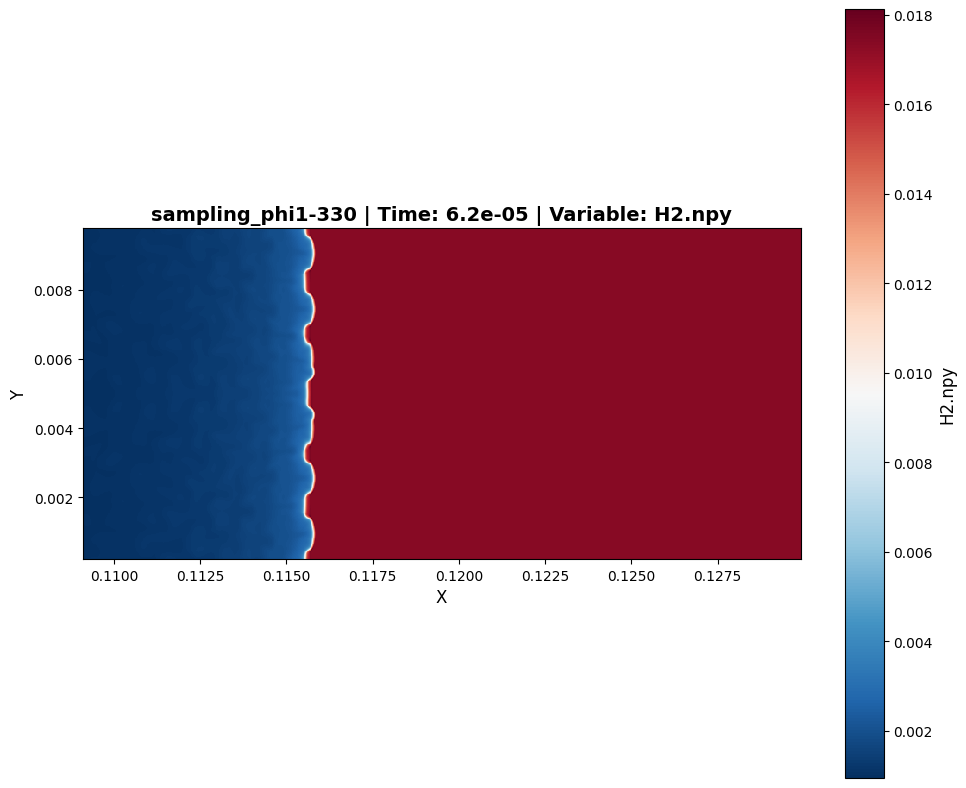


Data Statistics:
  Shape: (832, 384)
  Min: 9.497870e-04
  Max: 1.812518e-02
  Mean: 1.233111e-02
  Std: 7.400619e-03


In [2]:
# ========== Part 2: Visualization Configuration and Plotting ==========

# -------------------- Configuration Section --------------------
# Modify the following parameters based on the information above

split_name = 'train'  # Options: 'train', 'val', 'test'
case_idx = 1          # Case index (select based on the indices shown above)
time_idx = 10          # Time step index (0 to len(times)-1)
var_idx = 1           # Variable index (select based on the variable list above)

# Visualization parameters
figsize = (10, 8)
cmap = 'RdBu_r'          # Color map: 'jet', 'viridis', 'RdBu_r', 'coolwarm', etc.
show_colorbar = True
save_fig = False      # Whether to save the figure
save_path = './visualization.png'  # Save path

# ---------------------------------------------------------------

# Load the corresponding case
if split_name == 'train':
    case_name = train_groups[case_idx]
    case_path = os.path.join(data_root, 'train', f'{case_name}.npz')
elif split_name == 'val':
    case_name = val_groups[case_idx]
    case_path = os.path.join(data_root, 'val', f'{case_name}.npz')
elif split_name == 'test':
    case_name = test_groups[case_idx]
    case_path = os.path.join(data_root, 'test', f'{case_name}.npz')
else:
    raise ValueError(f"Invalid split_name: {split_name}")

# Load data
case_data = np.load(case_path)
data = case_data['data']  # shape: (T, C, H, W)

# Extract data for specified time step and variable
field_data = data[time_idx, var_idx, :, :]  # (H, W)

# Extract coordinates
Cx = coords[0]  # (H, W)
Cy = coords[1]  # (H, W)

# Visualization
fig, ax = plt.subplots(figsize=figsize)

im = ax.pcolormesh(Cx, Cy, field_data, cmap=cmap, shading='auto')

if show_colorbar:
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(variables[var_idx], fontsize=12)

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title(f'{case_name} | Time: {times[time_idx]} | Variable: {variables[var_idx]}',
             fontsize=14, fontweight='bold')
ax.set_aspect('equal')

plt.tight_layout()

if save_fig:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to: {save_path}")

plt.show()

# Display data statistics
print(f"\nData Statistics:")
print(f"  Shape: {field_data.shape}")
print(f"  Min: {field_data.min():.6e}")
print(f"  Max: {field_data.max():.6e}")
print(f"  Mean: {field_data.mean():.6e}")
print(f"  Std: {field_data.std():.6e}")